In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import optuna
import seaborn as sns

In [56]:
import os

# working directory
def current_path():
    print("Current working directory before")
    print(os.getcwd())
    print()
    
# Printing CWD before
current_path()
 
# Select your current directory
os.chdir('/home/marina/Documents/master/ml in computational biology/Assignment_3_2023_datasets')
 
# Printing CWD after
current_path()

Current working directory before
/home/marina/Documents/master/ml in computational biology/Assignment_3_2023_datasets

Current working directory before
/home/marina/Documents/master/ml in computational biology/Assignment_3_2023_datasets



In [57]:
# Load the gene expression data from the CSV file. The user can select any of the datasets inside current directory
file ="dataset1.csv"
data = pd.read_csv(file)
np.shape(data)

(200, 201)

In [58]:
data

,Unnamed: 0,G1,G2,G3,G4,G5,G6,G7,G8,G9,...,G191,G192,G193,G194,G195,G196,G197,G198,G199,G200
0,C1,9.651052,8.124121,7.918863,10.115044,9.840778,8.321928,7.832890,9.962896,6.569856,...,0.000000,9.105909,9.375039,0.000000,10.064743,6.475733,9.060696,7.954196,9.219169,9.820179
1,C2,7.108524,7.199672,4.459432,8.842350,7.426265,4.700440,7.870365,9.038919,0.000000,...,5.285402,6.714246,9.764872,9.826548,8.326429,0.000000,8.731319,0.000000,0.000000,0.000000
2,C3,8.339850,8.098032,6.228819,9.463524,8.758223,0.000000,8.113742,9.868823,7.066089,...,7.011227,7.629357,9.946906,9.691744,9.238405,0.000000,9.243174,5.643856,8.060696,8.632995
3,C4,10.005625,7.022368,9.312883,9.068778,9.971544,8.689998,5.321928,8.974415,0.000000,...,9.459432,9.707359,0.000000,6.247928,9.856426,0.000000,7.554589,9.221587,9.273796,10.169925
4,C5,8.103288,7.832890,6.491853,9.507795,0.000000,0.000000,8.000000,9.753217,6.820179,...,0.000000,7.761551,10.156083,0.000000,9.238405,8.511753,8.784635,5.523562,8.199672,8.665336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,C196,9.744834,6.066089,8.867279,8.344296,9.487840,0.000000,3.584963,0.000000,3.584963,...,9.394463,0.000000,6.714246,4.700440,9.398744,2.000000,6.614710,9.057992,8.748193,9.786270
196,C197,10.026523,0.000000,9.303781,9.079485,10.029287,8.784635,4.906891,8.912889,4.807355,...,9.715962,9.807355,7.774787,5.781360,9.818582,2.584963,7.409391,9.564149,9.245553,10.304922
197,C198,0.000000,0.000000,6.108524,9.405141,8.467606,6.108524,7.960002,9.710806,6.741467,...,0.000000,7.787903,0.000000,9.946906,9.233620,8.857981,9.174926,5.459432,7.965784,8.361944
198,C199,5.357552,6.303781,3.459432,7.507795,6.044394,2.584963,0.000000,0.000000,6.087463,...,3.807355,5.209453,9.625709,9.667112,6.491853,0.000000,7.179909,1.000000,5.554589,5.044394


We observe that our data consists of a matrix with rows repressenting the individual cells, columns representing the expressed genes and values representing the gene expressions of each cell

In [59]:
# Extract the gene names and cell IDs
genes = data.columns[1:]
cells = data.iloc[:, 0]

In [60]:
len(genes),len(cells)

(200, 200)

In [61]:
# Extract the expression values
expressions = data.iloc[:, 1:].values.T

In [62]:
len(expressions)

200

In [63]:
expressions.min(axis=1)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [64]:
expressions.max(axis=1)

array([10.30720081,  8.55458885,  9.69522829, 10.11504365, 10.39016896,
        9.24555271,  8.25738784, 10.25738784,  7.4429435 , 10.83762793,
        7.78790256,  8.59991284,  9.22641219,  7.49984589, 10.2911707 ,
        9.16741815,  8.07146236,  9.97871046,  8.6329952 ,  9.857981  ,
        9.50382574,  8.69696753,  8.73131903, 10.12282799,  7.62935662,
        9.10590851, 10.68999797,  9.44708323,  9.3553511 ,  7.66533592,
       10.91064273, 10.90011206, 10.26209485,  9.25266543, 10.71080643,
       10.07414146,  9.05799172, 10.84549005,  7.0768156 ,  9.45738088,
        8.14974712,  9.03891899,  9.87958325,  9.93663794,  9.45943162,
        9.74986943,  8.02236781, 10.88722062, 10.24317398, 10.63026713,
        9.12928302, 10.71424552,  9.6183855 ,  8.05528244, 10.37286506,
       10.2179577 ,  9.87958325,  9.22400167,  7.85174904,  7.77478706,
       10.28655776,  7.169925  ,  8.08214904,  8.63662462, 10.07012094,
        9.27612441,  8.69696753,  9.52943055,  9.73301532, 10.16

## Preprosseing


In [65]:
# Scale the expression values
scaler = StandardScaler()
scaled_data = scaler.fit_transform(expressions)
print(scaled_data)

[[ 0.71097649  0.13399739  0.35346162 ... -2.59009513 -0.08402664
  -0.06038023]
 [ 0.12893682  0.16383918  0.26907436 ... -2.59009513  0.21474837
   0.24765393]
 [ 0.05069596 -0.73331479 -0.38322545 ... -0.42216885 -0.68336475
  -1.9450926 ]
 ...
 [ 0.06416432 -2.19333132 -0.58735994 ... -0.65253307 -1.45993883
  -1.9450926 ]
 [ 0.54635003 -2.19333132  0.25604516 ...  0.23697599 -0.02181157
   0.03090489]
 [ 0.7754449  -2.19333132  0.45576056 ...  0.3775737  -0.18290733
   0.18480933]]


## Firstly we will perform PCA,t-SNE and UMAP just for visualization purposes on 2-D and 3-D so we select the number of components to be 2 and then  3 


## Visualization in 2D


In [66]:
# Perform Principal Component Analysis (PCA) with 2 components
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(scaled_data)

In [67]:
# Perform t-SNE with deafult parametes and 2 components
tsne = TSNE(n_components=2,random_state=42)
tsne_result = tsne.fit_transform(scaled_data)

In [68]:
# Perform UMAP with with deafult parametes and 2 components
umap_result = umap.UMAP(n_components=2,n_neighbors=10,min_dist=0.1,spread=1.0).fit_transform(scaled_data)

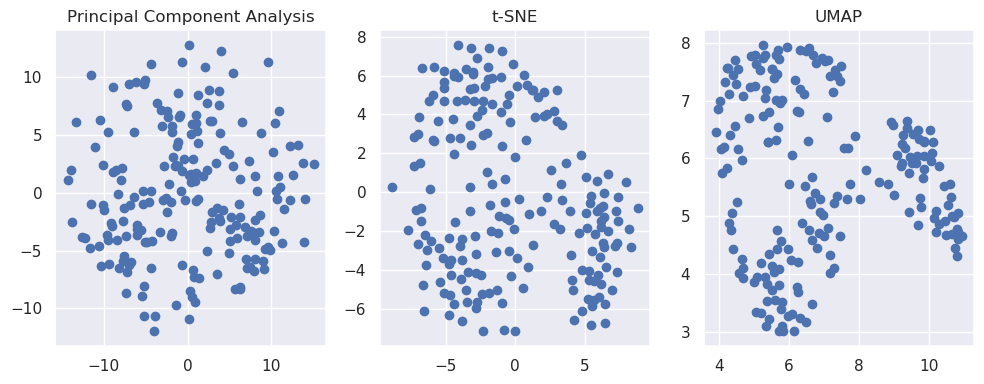

In [69]:
# Plot the results
plt.figure(figsize=(10, 4))
plt.subplot(131)
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('Principal Component Analysis')

plt.subplot(132)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.title('t-SNE')

plt.subplot(133)
plt.scatter(umap_result[:, 0], umap_result[:, 1])
plt.title('UMAP')

plt.tight_layout()
plt.show()

## Visualization in 3D

In [70]:
# Perform Principal Component Analysis (PCA) with 2 components
pca = PCA(n_components=3, random_state=42)
pca_result = pca.fit_transform(scaled_data)

In [71]:
# Perform t-SNE with deafult parametes and 2 components
tsne = TSNE(n_components=3,random_state=42)
tsne_result = tsne.fit_transform(scaled_data)

In [72]:
# Perform UMAP with with deafult parametes and 2 components
umap_result = umap.UMAP(n_components=3,n_neighbors=10,min_dist=0.1,spread=1.0).fit_transform(scaled_data)

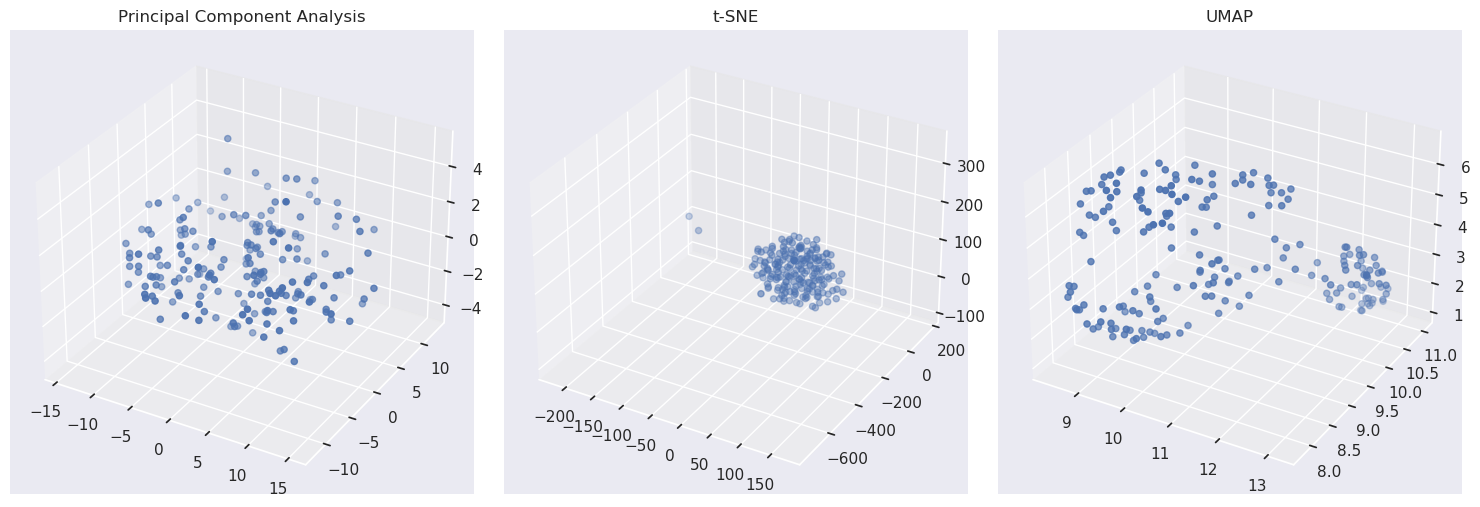

In [73]:
from mpl_toolkits.mplot3d import Axes3D


# Set the style
sns.set(style='darkgrid')

# Create a figure object and specify the subplot layout
fig = plt.figure(figsize=(15, 5))

# Create the subplots
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

# Plot the scatter plots
scatter1 = ax1.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2])
scatter2 = ax2.scatter(tsne_result[:, 0], tsne_result[:, 1], tsne_result[:, 2])
scatter3 = ax3.scatter(umap_result[:, 0], umap_result[:, 1], umap_result[:, 2])

# Set titles for the subplots
ax1.set_title('Principal Component Analysis')
ax2.set_title('t-SNE')
ax3.set_title('UMAP')

# Add labels if needed
'''
ax1.set_xlabel('Dimension 1')
ax1.set_ylabel('Dimension 2')
ax1.set_zlabel('Dimension 3')
ax2.set_xlabel('Dimension 1')
ax2.set_ylabel('Dimension 2')
ax2.set_zlabel('Dimension 3')
ax3.set_xlabel('Dimension 1')
ax3.set_ylabel('Dimension 2')
ax3.set_zlabel('Dimension 3')
'''

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


Comparing the 2D and 3D plots we can certaintly gain more insight from the 2D one in which we can observe the forming of three distinct clusters.

The above experiment is done just to get an insight of the structure of the data and it cannot be generalized to any dataset. We can also use this information to try and optimize our dimensionality reduction methods further.

## Optimize PCA with cumulative variance 

In order to find the correct number of components to keep in our downstream analysis we will select he pca components that justify 95% of the variance of our data

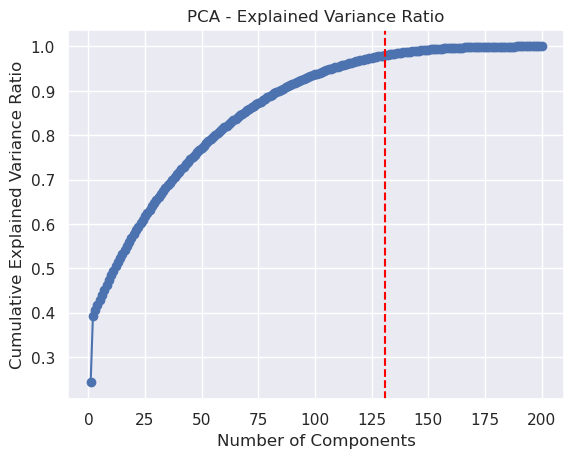

Selected number of components: 131


In [74]:
#selecting the correct number of component for PCA
pca = PCA( random_state=42)
pca_result = pca.fit_transform(scaled_data)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components to capture 95% of the variance
n_components = np.argmax(cumulative_variance_ratio >= 0.98) + 1

#or hardcode n_components and use trial and error 
#n_components=3

# Re-run PCA with the selected number of components
pca = PCA(n_components=n_components,random_state=42)
pca_result = pca.fit_transform(scaled_data)

# Plot the explained variance ratio
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA - Explained Variance Ratio')
plt.axvline(x=n_components, color='red', linestyle='--')
plt.show()

# Print the selected number of components
print("Selected number of components:", n_components)

In [75]:
#we save the pca reduced data for further analysis
pca_data=pca_result

In [76]:
'''
np.save('pca_data.npy', pca_data)
pca_data = np.load('pca_data.npy')
np.shape(pca_data)
'''

"\nnp.save('pca_data.npy', pca_data)\npca_data = np.load('pca_data.npy')\nnp.shape(pca_data)\n"

## Optimize an Agglomerative algorithm

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

import optuna


In [78]:
def objective(trial):
    n_clusters = trial.suggest_int("n_clusters", 2, 10)
    linkage = trial.suggest_categorical("linkage", ["ward", "complete", "average"])
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    cluster_labels = clusterer.fit_predict(pca_data)
    unique_labels = np.unique(cluster_labels)
    if len(unique_labels) > 1:
        score = silhouette_score(pca_data, cluster_labels)
        return score
    else:
        return -1.0  # Return a low score for a single cluster

    


In [79]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)



[I 2023-06-02 23:31:04,437] A new study created in memory with name: no-name-b1119a36-f0ba-447c-a974-bb98b1bb367a
[I 2023-06-02 23:31:04,452] Trial 0 finished with value: 0.0505801174640309 and parameters: {'n_clusters': 10, 'linkage': 'complete'}. Best is trial 0 with value: 0.0505801174640309.
[I 2023-06-02 23:31:04,459] Trial 1 finished with value: 0.14376181625806653 and parameters: {'n_clusters': 2, 'linkage': 'average'}. Best is trial 1 with value: 0.14376181625806653.
[I 2023-06-02 23:31:04,465] Trial 2 finished with value: 0.08651719877923454 and parameters: {'n_clusters': 7, 'linkage': 'average'}. Best is trial 1 with value: 0.14376181625806653.
[I 2023-06-02 23:31:04,470] Trial 3 finished with value: 0.08651719877923454 and parameters: {'n_clusters': 7, 'linkage': 'average'}. Best is trial 1 with value: 0.14376181625806653.
[I 2023-06-02 23:31:04,475] Trial 4 finished with value: 0.1313172011238234 and parameters: {'n_clusters': 2, 'linkage': 'complete'}. Best is trial 1 with

[I 2023-06-02 23:31:05,086] Trial 45 finished with value: 0.12700728097753616 and parameters: {'n_clusters': 3, 'linkage': 'average'}. Best is trial 1 with value: 0.14376181625806653.
[I 2023-06-02 23:31:05,102] Trial 46 finished with value: 0.08189651105824475 and parameters: {'n_clusters': 8, 'linkage': 'average'}. Best is trial 1 with value: 0.14376181625806653.
[I 2023-06-02 23:31:05,117] Trial 47 finished with value: 0.12346563740478686 and parameters: {'n_clusters': 4, 'linkage': 'average'}. Best is trial 1 with value: 0.14376181625806653.
[I 2023-06-02 23:31:05,136] Trial 48 finished with value: 0.1313172011238234 and parameters: {'n_clusters': 2, 'linkage': 'complete'}. Best is trial 1 with value: 0.14376181625806653.
[I 2023-06-02 23:31:05,154] Trial 49 finished with value: 0.07297717236876723 and parameters: {'n_clusters': 5, 'linkage': 'ward'}. Best is trial 1 with value: 0.14376181625806653.
[I 2023-06-02 23:31:05,171] Trial 50 finished with value: 0.12700728097753616 and p

[I 2023-06-02 23:31:05,850] Trial 90 finished with value: 0.10866545658889148 and parameters: {'n_clusters': 5, 'linkage': 'average'}. Best is trial 1 with value: 0.14376181625806653.
[I 2023-06-02 23:31:05,867] Trial 91 finished with value: 0.14376181625806653 and parameters: {'n_clusters': 2, 'linkage': 'average'}. Best is trial 1 with value: 0.14376181625806653.
[I 2023-06-02 23:31:05,884] Trial 92 finished with value: 0.14376181625806653 and parameters: {'n_clusters': 2, 'linkage': 'average'}. Best is trial 1 with value: 0.14376181625806653.
[I 2023-06-02 23:31:05,901] Trial 93 finished with value: 0.14376181625806653 and parameters: {'n_clusters': 2, 'linkage': 'average'}. Best is trial 1 with value: 0.14376181625806653.
[I 2023-06-02 23:31:05,919] Trial 94 finished with value: 0.14376181625806653 and parameters: {'n_clusters': 2, 'linkage': 'average'}. Best is trial 1 with value: 0.14376181625806653.
[I 2023-06-02 23:31:05,936] Trial 95 finished with value: 0.14376181625806653 an

In [80]:
# Get the best parameters
best_params = study.best_params

n_clusters = best_params["n_clusters"]
linkage = best_params["linkage"]
clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
cluster_labels = clusterer.fit_predict(pca_data)

# Print the parameters
print("Optimized Agglomerative Clustering Parameters:")
print("Number of clusters:", best_params["n_clusters"])
print("Linkage:", best_params["linkage"])

Optimized Agglomerative Clustering Parameters:
Number of clusters: 2
Linkage: average


In [81]:
print('The Silhouette score is:',silhouette_score(pca_data, cluster_labels))

The Silhouette score is: 0.14376181625806653


In [82]:
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0])

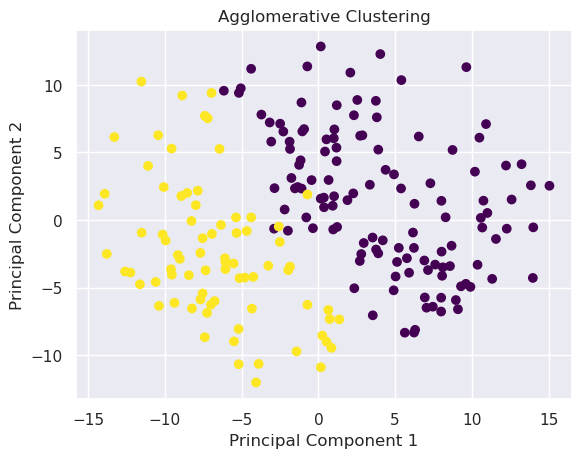

In [83]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap="viridis")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Agglomerative Clustering")
plt.show()


## Optimize the hyperparameters for the GMM model 

In [84]:
import optuna
from sklearn.mixture import GaussianMixture

In [85]:
# Define the objective function for Optuna optimization
def objective(trial):
   
    
    # Define the number of components search space
    n_components = trial.suggest_int('n_components', 2, 10)
    
    # Define the covariance matrix type search space
    covariance_type = trial.suggest_categorical('covariance_type', ['full', 'tied', 'diag', 'spherical'])
    
    # Fit the GMM model
    gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type,random_state=42 )
    gmm.fit(pca_data)
    
    # Calculate the BIC score
    bic_score = gmm.bic(pca_data)
    
    return bic_score



In [86]:
# Create an Optuna study
study = optuna.create_study(direction='minimize')

# Optimize the GMM hyperparameters
study.optimize(objective, n_trials=100)

[I 2023-06-02 23:31:06,272] A new study created in memory with name: no-name-3e1182cf-d5ad-4faf-96ce-26b750e3fb0b
[I 2023-06-02 23:31:06,298] Trial 0 finished with value: 78965.7866713578 and parameters: {'n_components': 5, 'covariance_type': 'spherical'}. Best is trial 0 with value: 78965.7866713578.
[I 2023-06-02 23:31:06,387] Trial 1 finished with value: 115751.32362664933 and parameters: {'n_components': 5, 'covariance_type': 'tied'}. Best is trial 0 with value: 78965.7866713578.
[I 2023-06-02 23:31:06,471] Trial 2 finished with value: 53676.355752181815 and parameters: {'n_components': 5, 'covariance_type': 'full'}. Best is trial 2 with value: 53676.355752181815.
[I 2023-06-02 23:31:06,542] Trial 3 finished with value: 84431.61424305849 and parameters: {'n_components': 6, 'covariance_type': 'full'}. Best is trial 2 with value: 53676.355752181815.
[I 2023-06-02 23:31:06,600] Trial 4 finished with value: 114286.02921401967 and parameters: {'n_components': 2, 'covariance_type': 'tied

[I 2023-06-02 23:31:10,022] Trial 43 finished with value: 74621.2739166801 and parameters: {'n_components': 2, 'covariance_type': 'full'}. Best is trial 12 with value: 26081.513580136845.
[I 2023-06-02 23:31:10,230] Trial 44 finished with value: 39852.79169417039 and parameters: {'n_components': 4, 'covariance_type': 'full'}. Best is trial 12 with value: 26081.513580136845.
[I 2023-06-02 23:31:10,300] Trial 45 finished with value: 79254.22279691728 and parameters: {'n_components': 3, 'covariance_type': 'spherical'}. Best is trial 12 with value: 26081.513580136845.
[I 2023-06-02 23:31:10,353] Trial 46 finished with value: 73008.37066174323 and parameters: {'n_components': 5, 'covariance_type': 'diag'}. Best is trial 12 with value: 26081.513580136845.
[I 2023-06-02 23:31:10,458] Trial 47 finished with value: 74621.2739166801 and parameters: {'n_components': 2, 'covariance_type': 'full'}. Best is trial 12 with value: 26081.513580136845.
[I 2023-06-02 23:31:10,575] Trial 48 finished with v

[I 2023-06-02 23:31:14,033] Trial 87 finished with value: 39852.79169417039 and parameters: {'n_components': 4, 'covariance_type': 'full'}. Best is trial 12 with value: 26081.513580136845.
[I 2023-06-02 23:31:14,092] Trial 88 finished with value: 79254.22279691728 and parameters: {'n_components': 3, 'covariance_type': 'spherical'}. Best is trial 12 with value: 26081.513580136845.
[I 2023-06-02 23:31:14,262] Trial 89 finished with value: 39852.79169417039 and parameters: {'n_components': 4, 'covariance_type': 'full'}. Best is trial 12 with value: 26081.513580136845.
[I 2023-06-02 23:31:14,373] Trial 90 finished with value: 26081.513580136845 and parameters: {'n_components': 3, 'covariance_type': 'full'}. Best is trial 12 with value: 26081.513580136845.
[I 2023-06-02 23:31:14,496] Trial 91 finished with value: 26081.513580136845 and parameters: {'n_components': 3, 'covariance_type': 'full'}. Best is trial 12 with value: 26081.513580136845.
[I 2023-06-02 23:31:14,560] Trial 92 finished wi

In [87]:
# Get the best hyperparameters
pca_n_components = study.best_params['n_components']
pca_covariance_type = study.best_params['covariance_type']

# Fit the GMM with the best hyperparameters
pca_gmm = GaussianMixture(n_components=pca_n_components, covariance_type=pca_covariance_type,random_state=42)
pcagmm=pca_gmm.fit(pca_data)

# Calculate the BIC score for the best model
pca_bic_score =pca_gmm.bic(pca_data)

# Get the posterior probabilities of each state for each cell
posterior_pca_probs = pca_gmm.predict_proba(pca_data)


cluster_pca_labels = pcagmm.predict(pca_data)

# Print the best hyperparameters and BIC score
print("Best number of components:", pca_n_components)
print("Best covariance matrix type:", pca_covariance_type)
print("Best BIC score:", pca_bic_score)


Best number of components: 3
Best covariance matrix type: full
Best BIC score: 26081.513580136845


In [88]:
# Get the GMM means and covariances
gmm_pca_means = pca_gmm.means_
gmm_pca_covariances = pcagmm.covariances_

np.shape(gmm_pca_means)


(3, 131)

In [89]:
print('The Silhouette score is:',silhouette_score(pca_data, cluster_pca_labels))

The Silhouette score is: 0.1411440371267199


In [90]:
np.shape(posterior_pca_probs)

(200, 3)

In [91]:
 #checking that all the probabilities add up to one
np.sum(posterior_pca_probs, axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [92]:
cluster1_joint_posterior = np.prod(posterior_pca_probs[cluster_pca_labels == 0], axis=0)
cluster2_joint_posterior = np.prod(posterior_pca_probs[cluster_pca_labels == 1], axis=0)
cluster3_joint_posterior = np.prod(posterior_pca_probs[cluster_pca_labels == 2], axis=0)
#cluster4_joint_posterior = np.prod(posterior_pca_probs[cluster_pca_labels == 3], axis=0)


cell_joint_distributions=[cluster1_joint_posterior,cluster2_joint_posterior,cluster3_joint_posterior]

cell_joint_distributions

[array([1., 0., 0.]), array([0., 1., 0.]), array([0., 0., 1.])]

In [93]:
len(posterior_pca_probs[cluster_pca_labels == 0]),len(posterior_pca_probs[cluster_pca_labels == 1]),len(posterior_pca_probs[cluster_pca_labels == 2])

(64, 65, 71)

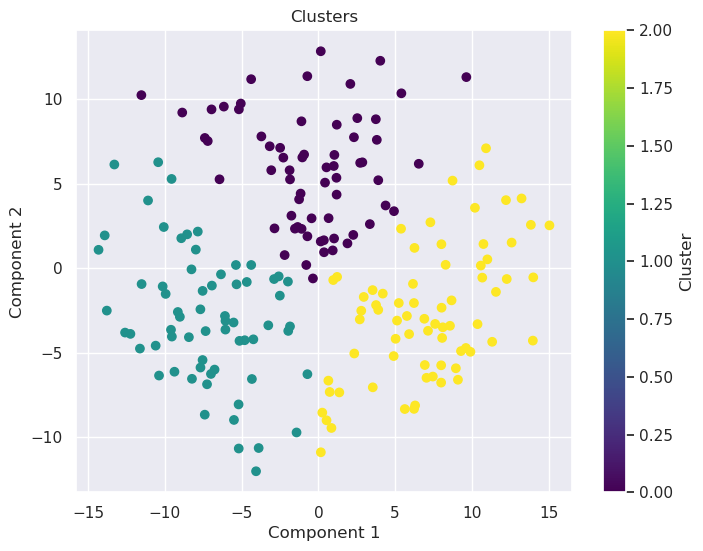

In [94]:
# Visualize Cluster Assignments (Scatter Plot)
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_pca_labels, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Clusters')
plt.colorbar(label='Cluster')
plt.show()

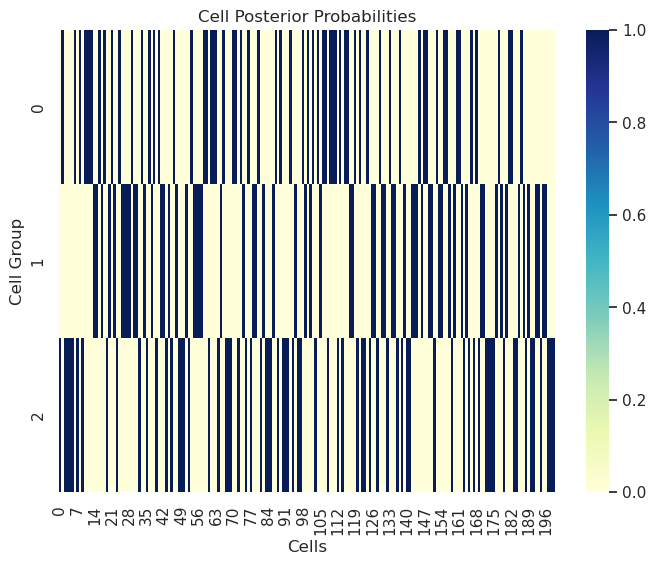

In [95]:
# Visualize Cell Posterior Probabilities (Heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(data=posterior_pca_probs.T, cmap='YlGnBu', cbar=True)
plt.xlabel('Cells')
plt.ylabel('Cell Group')
plt.title('Cell Posterior Probabilities')
plt.show()

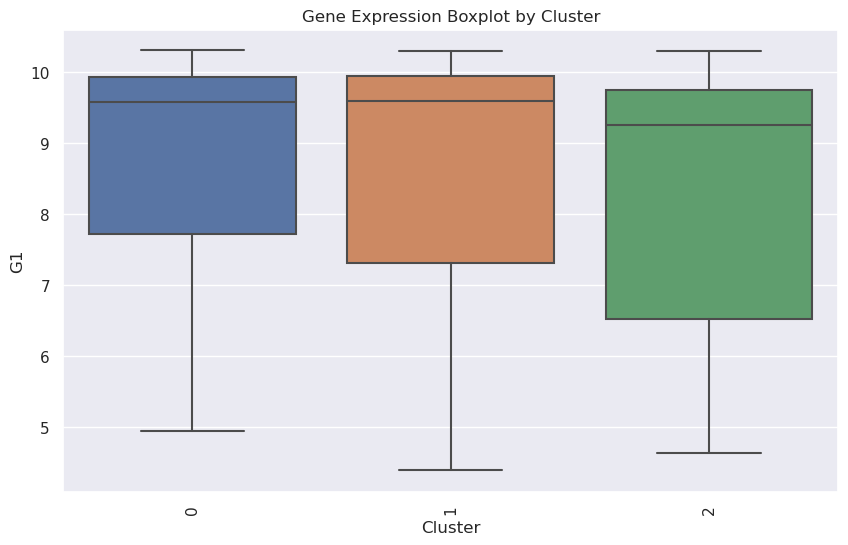

In [96]:
# Create a DataFrame with gene expression and cluster assignments
gene_expression_cluster = pd.concat([pd.Series(cells, name='Cell'), pd.Series(cluster_pca_labels, name='Cluster'), pd.DataFrame(expressions.T, columns=genes)], axis=1)

# Plot the gene expression boxplot by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=gene_expression_cluster, x='Cluster', y='G1', showfliers=False)
plt.xlabel('Cluster')
plt.ylabel('G1')
plt.title('Gene Expression Boxplot by Cluster')
plt.xticks(rotation=90)
plt.show()

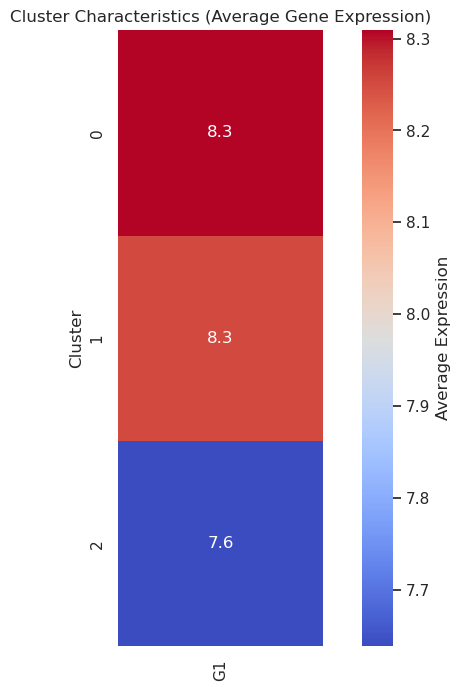

In [97]:
# Calculate the average gene expression by cluster
cluster_average_expression = gene_expression_cluster.groupby('Cluster')["G1"].mean().T

# Convert cluster_average_expression to a DataFrame
cluster_average_expression = pd.DataFrame(cluster_average_expression)

# Plot the cluster characteristics heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=cluster_average_expression, cmap='coolwarm', cbar_kws={'label': 'Average Expression'},annot=True, square=True)
#plt.xlabel('Cluster')
plt.ylabel('Cluster')
plt.title('Cluster Characteristics (Average Gene Expression)')
plt.xticks(rotation=90)
plt.show()


In [98]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

# Generate synthetic data using GMMs
def generate_data(num_samples, num_features, num_states, covariance_type):
    gmm = GaussianMixture(n_components=num_states, covariance_type=covariance_type)
    X, _ = make_classification(n_samples=num_samples, n_features=num_features)
    gmm.fit(X)
    data = gmm.sample(num_samples)[0]
    return np.array(data)  # Convert data to a NumPy array


In [99]:
def optimize_gmm(data):
    # Define the objective function for Optuna optimization
    def objective(trial):


        # Define the number of components search space
        n_components = trial.suggest_int('n_components', 2, 10)

        # Define the covariance matrix type search space
        covariance_type = trial.suggest_categorical('covariance_type', ['full', 'tied', 'diag', 'spherical'])

        # Fit the GMM model
        gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type,random_state=42 )
        gmm.fit(data)

        # Calculate the BIC score
        bic_score = gmm.bic(data)
        if len(unique_labels) > 1:
            score = silhouette_score(pca_data, cluster_labels)
            return bic_score
        else:
            return -1.0  # Return a low score for a single cluster


       
        
                # Create an Optuna study
        study = optuna.create_study(direction='minimize')

        # Optimize the GMM hyperparameters
        study.optimize(objective, n_trials=100)
        
        best_gmm_params = study.best_params
        print(best_gmm_params)
        

        best_n_components = study.best_gmm_params['n_components']
        best_covariance_type = study.best_gmm_params['covariance_type']

        # Fit the GMM with the best hyperparameters
        pca_gmm = GaussianMixture(n_components=best_n_components, covariance_type=best_covariance_type,random_state=42)
        
    return gmm

In [100]:
def optimize_agglomerative(data):
    def objective(trial):
        n_clusters = trial.suggest_int("n_clusters", 2, 10)
        linkage = trial.suggest_categorical("linkage", ["ward", "complete", "average"])
        clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        cluster_labels = clusterer.fit_predict(pca_data)
        unique_labels = np.unique(cluster_labels)
        if len(unique_labels) > 1:
            score = silhouette_score(pca_data, cluster_labels)
            return score
        else:
            return -1.0  # Return a low score for a single cluster

    # Create an Optuna study
    study = optuna.create_study(direction='minimize')

    # Optimize the GMM hyperparameters
    study.optimize(objective, n_trials=100)

    # Get the best parameters
    best_agglo_params = study.best_params
    print(best_agglo_params)

    n_clusters = best_agglo_params["n_clusters"]
    linkage = best_agglo_params["linkage"]
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    
    return agglomerative

In [101]:
# Define the pipelines

agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
gmm = GaussianMixture(n_components=pca_n_components, covariance_type=pca_covariance_type,random_state=42)

agglomerative_pipeline = Pipeline([
    ("pca", PCA(n_components=n_components)),
    ("agglomerative", agglomerative )
])



gmm_pipeline = Pipeline([
    ("pca", PCA(n_components=n_components)),
    ("gmm", gmm)
])


In [102]:
 from sklearn import metrics

In [103]:
#Parameters
num_samples = 1000
num_features = 100
n_states = 2  # Number of states in GMMs
cov_type = "full"  # Covariance type in GMMs

# Generate data
data = generate_data(num_samples, num_features, n_states, cov_type)

# Reshape data to have consistent shape
data = data.reshape(-1, num_features)

# Fit and evaluate the pipelines
agglomerative = optimize_agglomerative(data)
agglomerative_pipeline["pca"].n_components = data.shape[1]
agglomerative_pipeline.fit(data)
agglomerative_labels = agglomerative_pipeline["agglomerative"].labels_
agglomerative_score = silhouette_score(data, agglomerative_labels)
agglomerative_score2=metrics.calinski_harabasz_score(data, agglomerative_labels)
agglomerative_score3=metrics.davies_bouldin_score(data,agglomerative_labels)


gmm = optimize_gmm(data)
gmm_pipeline["pca"].n_components = data.shape[1]
gmm_pipeline.fit(data)
gmm_labels = gmm_pipeline["gmm"].predict(data)
gmm_score = silhouette_score(data, gmm_labels)
gmm_score2=metrics.calinski_harabasz_score(data, gmm_labels)
gmm_score3=metrics.davies_bouldin_score(data, gmm_labels)

# Print the results
print("Number of States:", n_states)
print("Covariance Type:", cov_type)
print("Agglomerative Clustering Silhouette Score:", agglomerative_score)
print("GMM Silhouette Score:", gmm_score)
print("Agglomerative Clustering Calinski-Harabasz Index:",agglomerative_score2)
print("GMM Calinski-Harabasz Index:", gmm_score2)
print("Agglomerative Clustering Davies-Bouldin score:",agglomerative_score3)
print("GMM Davies-Bouldin score:", gmm_score3)




print("----------------------------------------------")


[I 2023-06-02 23:31:16,746] A new study created in memory with name: no-name-8a9c3670-04a6-46c6-b23b-043fa66e337e
[I 2023-06-02 23:31:16,771] Trial 0 finished with value: 0.07764091393091395 and parameters: {'n_clusters': 3, 'linkage': 'complete'}. Best is trial 0 with value: 0.07764091393091395.
[I 2023-06-02 23:31:16,783] Trial 1 finished with value: 0.08189651105824475 and parameters: {'n_clusters': 8, 'linkage': 'average'}. Best is trial 0 with value: 0.07764091393091395.
[I 2023-06-02 23:31:16,795] Trial 2 finished with value: 0.13764964174331606 and parameters: {'n_clusters': 2, 'linkage': 'ward'}. Best is trial 0 with value: 0.07764091393091395.
[I 2023-06-02 23:31:16,802] Trial 3 finished with value: 0.08189651105824475 and parameters: {'n_clusters': 8, 'linkage': 'average'}. Best is trial 0 with value: 0.07764091393091395.
[I 2023-06-02 23:31:16,808] Trial 4 finished with value: 0.07297717236876723 and parameters: {'n_clusters': 5, 'linkage': 'ward'}. Best is trial 4 with valu

[I 2023-06-02 23:31:17,426] Trial 44 finished with value: 0.044522170485711034 and parameters: {'n_clusters': 10, 'linkage': 'ward'}. Best is trial 43 with value: 0.044522170485711034.
[I 2023-06-02 23:31:17,446] Trial 45 finished with value: 0.044522170485711034 and parameters: {'n_clusters': 10, 'linkage': 'ward'}. Best is trial 43 with value: 0.044522170485711034.
[I 2023-06-02 23:31:17,468] Trial 46 finished with value: 0.044522170485711034 and parameters: {'n_clusters': 10, 'linkage': 'ward'}. Best is trial 43 with value: 0.044522170485711034.
[I 2023-06-02 23:31:17,486] Trial 47 finished with value: 0.044522170485711034 and parameters: {'n_clusters': 10, 'linkage': 'ward'}. Best is trial 43 with value: 0.044522170485711034.
[I 2023-06-02 23:31:17,501] Trial 48 finished with value: 0.044522170485711034 and parameters: {'n_clusters': 10, 'linkage': 'ward'}. Best is trial 43 with value: 0.044522170485711034.
[I 2023-06-02 23:31:17,515] Trial 49 finished with value: 0.044522170485711

[I 2023-06-02 23:31:18,117] Trial 89 finished with value: 0.048878055122386944 and parameters: {'n_clusters': 9, 'linkage': 'ward'}. Best is trial 43 with value: 0.044522170485711034.
[I 2023-06-02 23:31:18,130] Trial 90 finished with value: 0.044522170485711034 and parameters: {'n_clusters': 10, 'linkage': 'ward'}. Best is trial 43 with value: 0.044522170485711034.
[I 2023-06-02 23:31:18,146] Trial 91 finished with value: 0.044522170485711034 and parameters: {'n_clusters': 10, 'linkage': 'ward'}. Best is trial 43 with value: 0.044522170485711034.
[I 2023-06-02 23:31:18,163] Trial 92 finished with value: 0.044522170485711034 and parameters: {'n_clusters': 10, 'linkage': 'ward'}. Best is trial 43 with value: 0.044522170485711034.
[I 2023-06-02 23:31:18,181] Trial 93 finished with value: 0.044522170485711034 and parameters: {'n_clusters': 10, 'linkage': 'ward'}. Best is trial 43 with value: 0.044522170485711034.
[I 2023-06-02 23:31:18,194] Trial 94 finished with value: 0.0445221704857110

{'n_clusters': 10, 'linkage': 'ward'}
Number of States: 2
Covariance Type: full
Agglomerative Clustering Silhouette Score: 0.09566976703454977
GMM Silhouette Score: -0.0002857479383960378
Agglomerative Clustering Calinski-Harabasz Index: 1.4557260262550578
GMM Calinski-Harabasz Index: 1.0279786479274178
Agglomerative Clustering Davies-Bouldin score: 0.8253827848344772
GMM Davies-Bouldin score: 30.88023212446958
----------------------------------------------


In [104]:
#Parameters
num_samples = 100
num_features = 100
n_states =4  # Number of states in GMMs
cov_type = "full"  # Covariance type in GMMs

# Generate data
data = generate_data(num_samples, num_features, n_states, cov_type)

# Reshape data to have consistent shape
data = data.reshape(-1, num_features)

# Fit and evaluate the pipelines
agglomerative = optimize_agglomerative(data)
agglomerative_pipeline["pca"].n_components = data.shape[1]
agglomerative_pipeline.fit(data)
agglomerative_labels = agglomerative_pipeline["agglomerative"].labels_
agglomerative_score = silhouette_score(data, agglomerative_labels)
agglomerative_score2=metrics.calinski_harabasz_score(data, agglomerative_labels)
agglomerative_score3=metrics.davies_bouldin_score(data,agglomerative_labels)


gmm = optimize_gmm(data)
gmm_pipeline["pca"].n_components = data.shape[1]
gmm_pipeline.fit(data)
gmm_labels = gmm_pipeline["gmm"].predict(data)
gmm_score = silhouette_score(data, gmm_labels)
gmm_score2=metrics.calinski_harabasz_score(data, gmm_labels)
gmm_score3=metrics.davies_bouldin_score(data, gmm_labels)

# Print the results
print("Number of States:", n_states)
print("Covariance Type:", cov_type)
print("Agglomerative Clustering Silhouette Score:", agglomerative_score)
print("GMM Silhouette Score:", gmm_score)
print("Agglomerative Clustering Calinski-Harabasz Index:",agglomerative_score2)
print("GMM Calinski-Harabasz Index:", gmm_score2)
print("Agglomerative Clustering Davies-Bouldin score:",agglomerative_score3)
print("GMM Davies-Bouldin score:", gmm_score3)



print("----------------------------------------------")

[I 2023-06-02 23:31:19,004] A new study created in memory with name: no-name-92704234-b53e-4e4e-9e49-cf7abd554c28
[I 2023-06-02 23:31:19,023] Trial 0 finished with value: 0.07530902690347517 and parameters: {'n_clusters': 4, 'linkage': 'complete'}. Best is trial 0 with value: 0.07530902690347517.
[I 2023-06-02 23:31:19,039] Trial 1 finished with value: 0.051964048716034446 and parameters: {'n_clusters': 7, 'linkage': 'complete'}. Best is trial 1 with value: 0.051964048716034446.
[I 2023-06-02 23:31:19,047] Trial 2 finished with value: 0.14376181625806653 and parameters: {'n_clusters': 2, 'linkage': 'average'}. Best is trial 1 with value: 0.051964048716034446.
[I 2023-06-02 23:31:19,054] Trial 3 finished with value: 0.08651719877923454 and parameters: {'n_clusters': 7, 'linkage': 'average'}. Best is trial 1 with value: 0.051964048716034446.
[I 2023-06-02 23:31:19,062] Trial 4 finished with value: 0.0708120304335731 and parameters: {'n_clusters': 5, 'linkage': 'complete'}. Best is trial 

[I 2023-06-02 23:31:19,655] Trial 44 finished with value: 0.048878055122386944 and parameters: {'n_clusters': 9, 'linkage': 'ward'}. Best is trial 6 with value: 0.044522170485711034.
[I 2023-06-02 23:31:19,670] Trial 45 finished with value: 0.048375141752306006 and parameters: {'n_clusters': 8, 'linkage': 'ward'}. Best is trial 6 with value: 0.044522170485711034.
[I 2023-06-02 23:31:19,683] Trial 46 finished with value: 0.080737454681374 and parameters: {'n_clusters': 9, 'linkage': 'average'}. Best is trial 6 with value: 0.044522170485711034.
[I 2023-06-02 23:31:19,696] Trial 47 finished with value: 0.05596129348556451 and parameters: {'n_clusters': 6, 'linkage': 'ward'}. Best is trial 6 with value: 0.044522170485711034.
[I 2023-06-02 23:31:19,712] Trial 48 finished with value: 0.0505801174640309 and parameters: {'n_clusters': 10, 'linkage': 'complete'}. Best is trial 6 with value: 0.044522170485711034.
[I 2023-06-02 23:31:19,729] Trial 49 finished with value: 0.044522170485711034 and 

[I 2023-06-02 23:31:20,313] Trial 89 finished with value: 0.048878055122386944 and parameters: {'n_clusters': 9, 'linkage': 'ward'}. Best is trial 6 with value: 0.044522170485711034.
[I 2023-06-02 23:31:20,331] Trial 90 finished with value: 0.044522170485711034 and parameters: {'n_clusters': 10, 'linkage': 'ward'}. Best is trial 6 with value: 0.044522170485711034.
[I 2023-06-02 23:31:20,349] Trial 91 finished with value: 0.044522170485711034 and parameters: {'n_clusters': 10, 'linkage': 'ward'}. Best is trial 6 with value: 0.044522170485711034.
[I 2023-06-02 23:31:20,367] Trial 92 finished with value: 0.044522170485711034 and parameters: {'n_clusters': 10, 'linkage': 'ward'}. Best is trial 6 with value: 0.044522170485711034.
[I 2023-06-02 23:31:20,380] Trial 93 finished with value: 0.044522170485711034 and parameters: {'n_clusters': 10, 'linkage': 'ward'}. Best is trial 6 with value: 0.044522170485711034.
[I 2023-06-02 23:31:20,394] Trial 94 finished with value: 0.048878055122386944 an

{'n_clusters': 10, 'linkage': 'ward'}
Number of States: 4
Covariance Type: full
Agglomerative Clustering Silhouette Score: 0.1382289269255864
GMM Silhouette Score: 0.017040009463713927
Agglomerative Clustering Calinski-Harabasz Index: 2.3690158231343443
GMM Calinski-Harabasz Index: 1.3600614591051257
Agglomerative Clustering Davies-Bouldin score: 1.5453470044175213
GMM Davies-Bouldin score: 6.500013155265136
----------------------------------------------
